# 1 - Perkenalan

Nama Peneliti :Suma Bimantoro Andru

Dataset: phase1_ftds_015_rmt

Objective:<b>model Classification untuk memprediksi apakah seorang pasien akan meninggal atau tidak </b>

# 2 - Import Libraries

In [248]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# 3 - Data Loading

<h1>Query dari BQ</h1>
<b>select</b> * <b>from</b> `ftds-hacktiv8-project.phase1_ftds_015_rmt.heart-failure`

In [249]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
# Load Dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase1/GC3/dataset/h8dsft_P1G3_Suma_Bimantoro_Andru.csv')

In [251]:
#Tampilkan Head
data.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


In [252]:
#Tampilkan Tail
data.tail(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [253]:
# Duplicate Dataset

data_copy = data.copy()

In [254]:
#tampilkan informasi untuk melihat field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<p>Di dataset ini ada <b>13</b> columns dan <b>299</b> row, tipe data semua <b>numerik</b></p>

In [255]:
#check dataset
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<p>Terlihat dari <b>median</b> bernilai <b>60</b>, yang artinya banyak <b>umur 60</b> dan umur paling muda di umur <b>40</b></p>

# 4 - Exploratory Data Analysis (EDA)

<h1><b>DEATH_EVENT</b></h1>

In [256]:
#cek Feature
data['DEATH_EVENT'].unique()

array([1, 0])

<p>Kematian (<b>1=yes, 0=no</b>)</p>

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

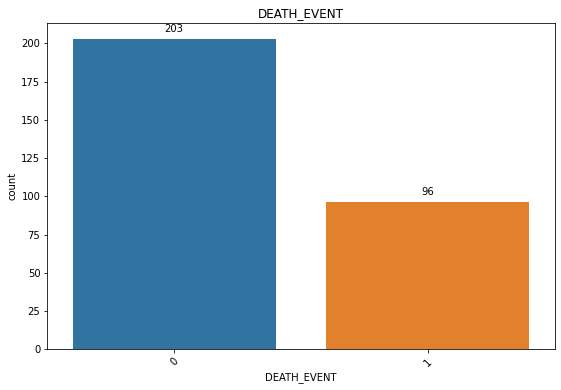

In [257]:
#membuat plot untuk cek DEATH_EVENT
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
DEATH_EVENT = sns.countplot(x='DEATH_EVENT', data=data, order=data.DEATH_EVENT.value_counts().index)
for p in DEATH_EVENT.patches:
    DEATH_EVENT.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('count')
plt.xticks(rotation=45)

In [258]:
#melihat jumlah dan persen terhadap column DEATH_EVENT
(data['DEATH_EVENT'].value_counts()/data['DEATH_EVENT'].count())*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

<p><b>Tidak meninggal</b> berjumlah <b>203</b> dan <b>Meninggal</b> berjumlah <b>96</b>,ada sekitar <b>67%</b> untuk tidak meninggal dan <b>32%</b> untuk user <b>meninggal</b></p>

<h1><b>age</b></h1>

In [259]:
#cek column age
data['age'].unique()

array([42.   , 46.   , 65.   , 53.   , 50.   , 70.   , 60.   , 59.   ,
       72.   , 49.   , 75.   , 57.   , 48.   , 62.   , 52.   , 55.   ,
       58.   , 86.   , 66.   , 80.   , 45.   , 67.   , 90.   , 95.   ,
       63.   , 61.   , 60.667, 40.   , 73.   , 51.   , 82.   , 43.   ,
       85.   , 64.   , 68.   , 54.   , 69.   , 47.   , 44.   , 81.   ,
       87.   , 94.   , 56.   , 41.   , 78.   , 77.   , 79.   ])

<p><b>umur</b> yang paling muda <b>41</b> dan paling tua <b>94</b>, <b>peneliti</b> melihat colomn <b>ada umur 60.667 nanti akan replace ke 60, ada kemungkinan ada salah input</p>

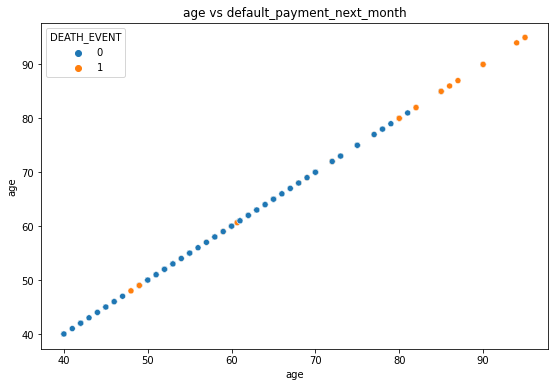

In [260]:
#membuat plot untuk melihat berhubungan feature dengan target
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='age', data=data, hue='DEATH_EVENT')
plt.title('age vs default_payment_next_month')
plt.xlabel('age')
plt.ylabel('age')
plt.show()

<p>Terlihat disini ada lebih banyak <b>potensi kematian dari besarnnya umur</b>terlihat korelasi antara umur dan kematian, feature ini akan dipakai nantinnya</p>

<h1><b>anaemia<b></h1>

In [261]:
#cek column
data['anaemia'].unique()

array([1, 0])

<p>Terlihat disini untuk 1 pasien <b>artinya terkena anaemia</b></p>
<p>Terlihat disini untuk 0 pasien <b>artinya tidak terkena anaemia</b></p>

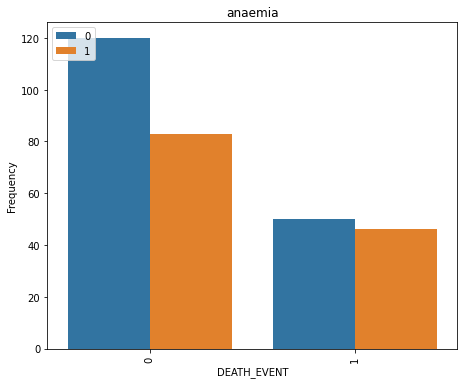

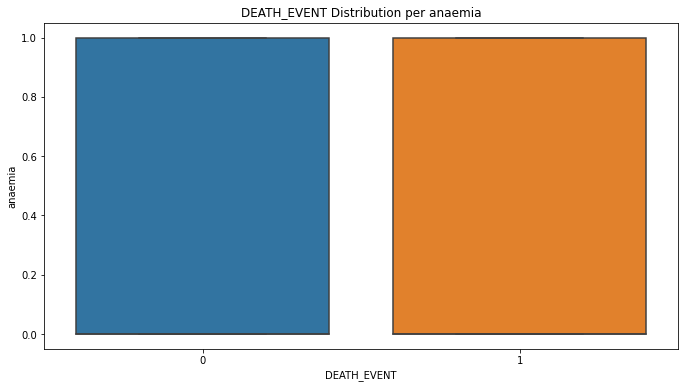

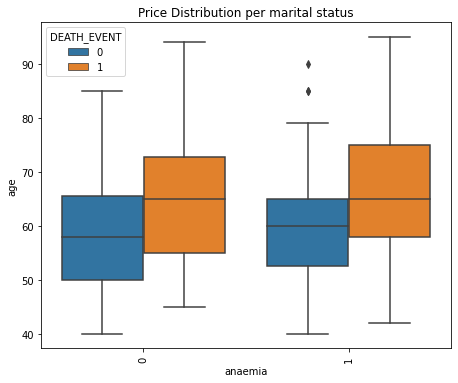

In [262]:
#Membuat Plot hubungan dengan default_payment_next_month
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 2)
sns.countplot(x='DEATH_EVENT', data=data, hue='anaemia')
plt.title('anaemia')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
#Membuat Boxplot
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='DEATH_EVENT', y='anaemia', data=data)
plt.title('DEATH_EVENT Distribution per anaemia')
plt.xlabel('DEATH_EVENT')
plt.ylabel('anaemia')

plt.figure(figsize=(25,6))
plt.subplot(1, 3, 3)
sns.boxplot(x='anaemia', y='age', data=data, hue='DEATH_EVENT')
plt.title('Price Distribution per marital status')
plt.xlabel('anaemia')
plt.ylabel('age')
plt.xticks(rotation=90)
plt.show()


<p>Dilihat dari sini <b>anaemia tidak terlalu berhubungan dengan kematian</b>, walaupun ada yang terkena aneamia, <b>yang mengalami kematian dikarenakan di umur 60 keatas</b></p>

Note:<b>sex</b>(1=male, 2=female)<br>
Note:<b>Marital_status</b>(1=married, 2=single, 3=others)

-Note
<p> untuk 1 pasien <b>artinya terkena anaemia</b></p> dan warna orange adalah kematian
<p>disini untuk 0 pasien <b>artinya tidak terkena anaemia dan warna biru adalah tidak meninggal</b></p>

<h1><b>creatinine_phosphokinase</b></h1>

In [263]:
#cek dataset column
data['creatinine_phosphokinase'].unique()

array([ 250,  168,  160,   91,  582,  125,   52,  161,   76,  280,  156,
       1896,   56,  211,   80,  128,  159,  124,  129,  328,  482,  167,
        131,  166, 2522, 1051,  249,  281,  291,  335,   58, 2334,  835,
        972,   81,  572,   88,  618,  892,  235,  260,  144,   68,   96,
        776,  326,  213,   84,  337, 1820,  112,  318,   69,   61,  400,
        719,  151,  101, 2281,  720, 1185,  207,  655,  336,  233,  244,
        855,   53,  358, 1202,  615,  588,   92,   59,  143,  102,  113,
        200,   62,  675,  157, 2060, 3964,  427,  246,  212,  146,  111,
        553,  789,  364,   47,   66,  115, 1199,  231, 1380,  577, 7702,
        110,  154,  514,  305,  898,  369,  646,  943,  176,  395,  145,
         57, 2017,  258,  981,   70, 2656,  371, 5209,  248, 1548,  185,
        132, 2442,  478,  104,  232,  191,  257,   64,  123,  220,   75,
        109, 5882, 1876,  292,   60,  270, 4540, 2261, 1846,  130,  198,
       1211,  135, 1021,   86, 2794,   93,   90,  6

<p>Setelah peneliti lihat ini adalah <b>data jumlah kreatin</b></p>

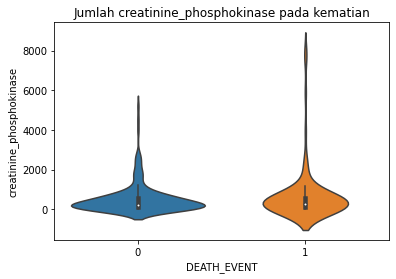

In [264]:
#Mebuat violin plot
sns.violinplot(x="DEATH_EVENT", y="creatinine_phosphokinase", data=data, size=4)
plt.title("Jumlah creatinine_phosphokinase pada kematian")
plt.show()

<p><b>Adanya potensi kematian jika creatinine_phosphokinase makin tinggi</b> dilihat disini feature ini akan dipakai nanti</p>

<h1><b>Diabetes</b></h1>

In [265]:
data['diabetes'].unique()

array([1, 0])

Peneliti melihat column diabetes adalah column bersifat categori dimana <b>1 ada terkena diabetes</b> dan <b>0 tidak terkena diabetes</b>

Text(0, 0.5, 'Frequency')

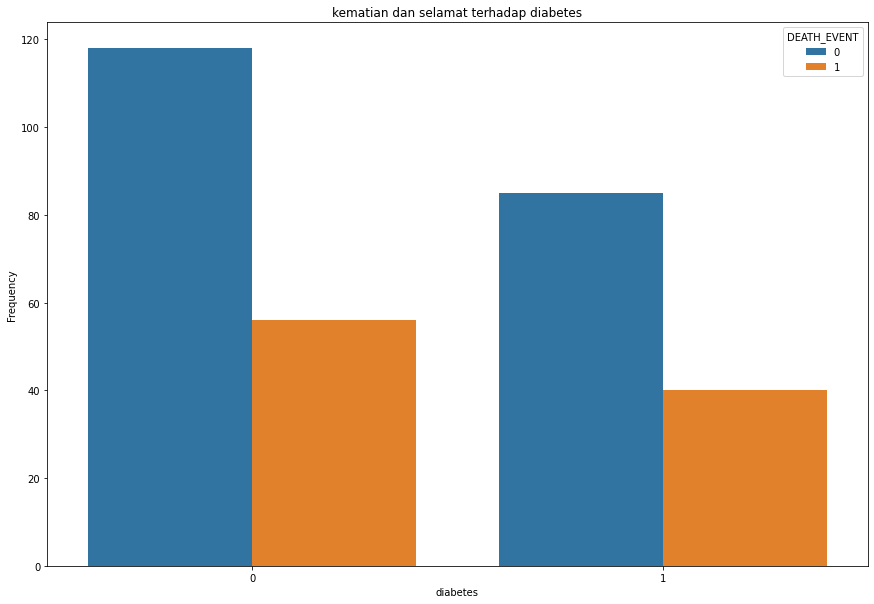

In [266]:
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='diabetes', data=data,hue='DEATH_EVENT')
plt.title('kematian dan selamat terhadap diabetes')
plt.xlabel('diabetes')
plt.ylabel('Frequency')

<p>Dilihat dari <b>visualisasi</b> pasien terkena diabetes lebih banyak yang tidak meninggal dari pada yang meninggal pada saat terkena diabetes

<h1><b>ejection_fraction</h1></b>

In [267]:
#cek column
data['ejection_fraction'].unique()

array([15, 17, 20, 25, 30, 35, 38, 40, 45, 50, 55, 60, 62, 65, 70, 80, 14])

Peneliti disini melihat sifat data agresion 

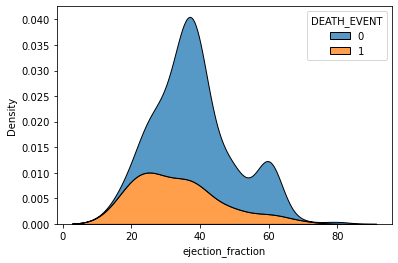

In [268]:
#membuat kde plot
sns.kdeplot(data=data, x="ejection_fraction", hue="DEATH_EVENT", multiple="stack")

tingkat kematian kecil makin jumlah ejection_fraction membesar tetapi terlihat juga tingkat kesembuhan juga besar semakin ejection_fraction mengecil, <b>jadi peneliti melihat adannya bias disini</b>

<h1><b>high_blood_pressure</b></h1>

In [269]:
#cek column
data['high_blood_pressure'].unique()

array([0, 1])

Peneliti melihat column high_blood_pressure adalah column bersifat categori dimana <b>1 ada terkena high_blood_pressure</b> dan <b>0 tidak terkena high_blood_pressure</b>

In [270]:
#cek column
data['platelets'].unique()

array([213000.  , 271000.  , 327000.  , 418000.  , 279000.  , 237000.  ,
       276000.  , 244000.  , 196000.  , 302000.  , 318000.  , 365000.  ,
       274000.  , 427000.  , 297000.  , 263358.03, 153000.  , 395000.  ,
       621000.  , 127000.  , 329000.  , 259000.  ,  62000.  , 404000.  ,
       232000.  , 319000.  , 221000.  , 348000.  , 235000.  , 277000.  ,
        75000.  , 305000.  , 268000.  , 371000.  , 533000.  , 231000.  ,
       236000.  , 255000.  , 162000.  , 228000.  , 192000.  , 294000.  ,
       215000.  , 422000.  , 451000.  , 390000.  , 270000.  , 216000.  ,
       293000.  , 164000.  , 229000.  , 201000.  , 226000.  , 283000.  ,
       257000.  , 220000.  , 223000.  , 324000.  , 275000.  , 362000.  ,
       321000.  , 351000.  , 286000.  , 132000.  , 358000.  ,  87000.  ,
       543000.  , 222000.  , 194000.  , 317000.  , 507000.  , 203000.  ,
       300000.  , 172000.  , 309000.  , 265000.  , 208000.  , 742000.  ,
       151000.  , 166000.  , 389000.  , 210000.  , 

<p>Setelah peneliti lihat ini adalah <b>data jumlah platelets</b></p>

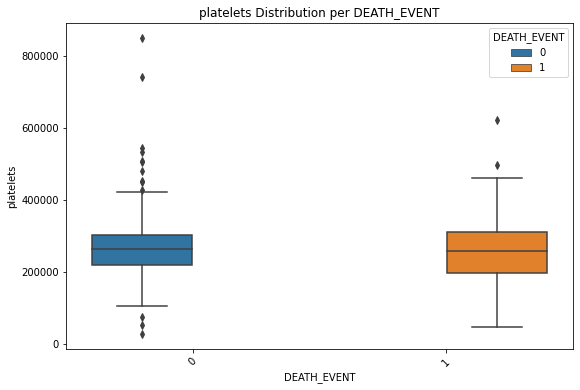

In [271]:
#membuat bar dan boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='platelets', data=data, hue='DEATH_EVENT')
plt.title('platelets Distribution per DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('platelets')
plt.xticks(rotation=45)
plt.show()


Dari <b>boxplot</b> ini dapat diketahui bahwa <b>tidak ada hubungan linear</b> antara kolom <b>platelets</b> dengan kematian,karena di box terlihat sama sejajar dan kesembuhan lebih banyak

Text(0, 0.5, 'Frequency')

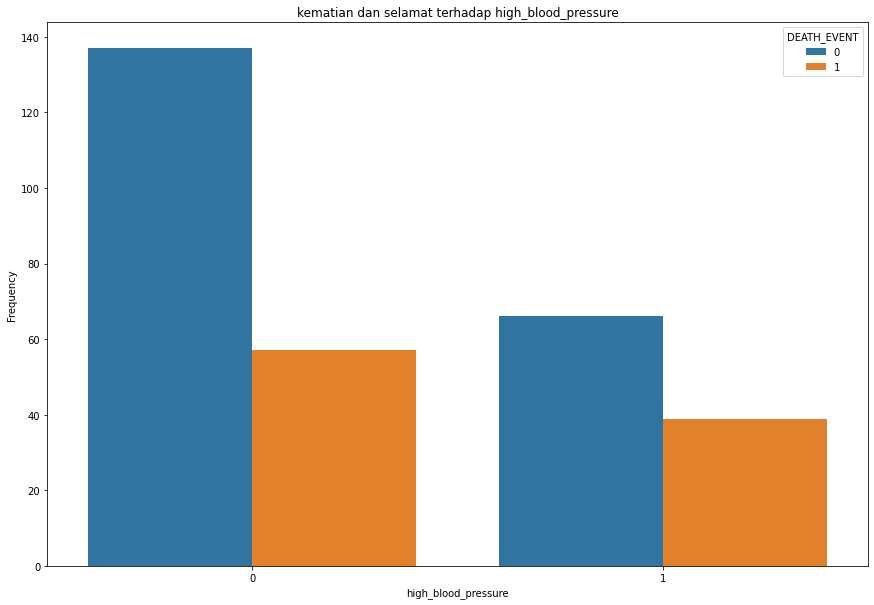

In [272]:
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='high_blood_pressure', data=data,hue='DEATH_EVENT')
plt.title('kematian dan selamat terhadap high_blood_pressure')
plt.xlabel('high_blood_pressure')
plt.ylabel('Frequency')

<p>Dilihat dari <b>visualisasi</b> pasien terkena high_blood_pressure lebih banyak yang tidak meninggal dari pada yang meninggal pada saat terkena high_blood_pressure

<h1><b>serum_creatinine</b></h1>

In [273]:
#cek isi kategori column serum_creatinine
data['serum_creatinine'].unique()

array([1.3 , 2.1 , 2.7 , 1.4 , 1.  , 1.2 , 2.5 , 5.  , 1.6 , 1.83, 1.7 ,
       0.9 , 0.8 , 0.5 , 0.7 , 1.1 , 3.  , 2.2 , 0.75, 1.18, 2.3 , 0.6 ,
       1.9 , 3.2 , 1.5 , 6.8 , 9.  , 4.4 , 2.9 , 2.4 , 3.5 , 2.  , 3.8 ,
       9.4 , 3.4 , 1.8 , 4.  , 5.8 , 3.7 , 6.1 ])

Setelah peneliti lihat ini adalah data jumlah serum_creatinine

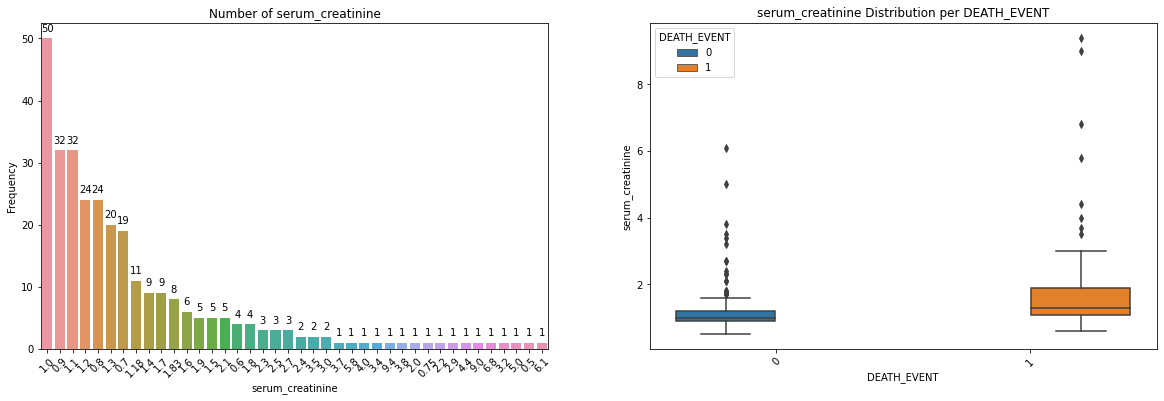

In [274]:
#membuat bar dan boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
te = sns.countplot(x='serum_creatinine', data=data, order=data.serum_creatinine.value_counts().index)
for p in te.patches:
    te.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of serum_creatinine')
plt.xlabel('serum_creatinine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=data, hue='DEATH_EVENT')
plt.title('serum_creatinine Distribution per DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('serum_creatinine')
plt.xticks(rotation=45)
plt.show()

ada pergerakan di boxplot terhadap kematian, makin tinggi serum_creatinine makin tinggi kematian

<h1><b>serum_sodium </b></h1>

In [275]:
#cek dataset
data['serum_sodium']

0      136
1      124
2      116
3      139
4      134
      ... 
294    145
295    136
296    138
297    139
298    140
Name: serum_sodium, Length: 299, dtype: int64

Setelah peneliti lihat ini adalah data jumlah serum_sodium

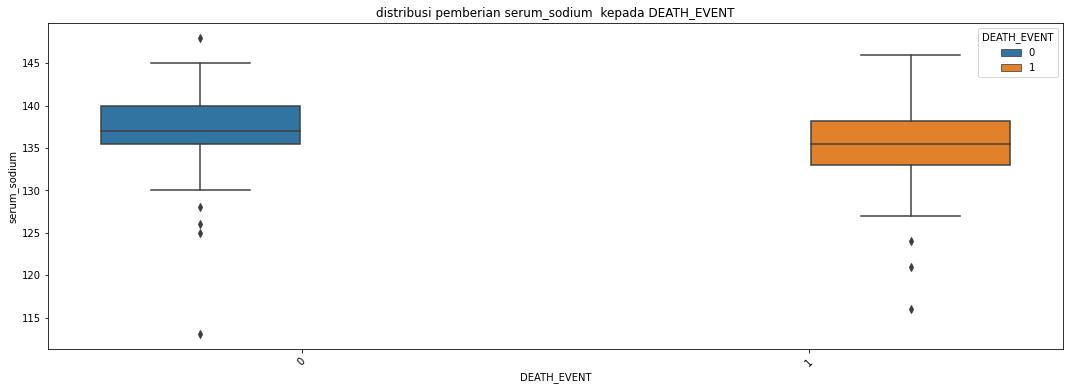

In [276]:
#membuat boxplot
plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=data, hue='DEATH_EVENT')
plt.title('distribusi pemberian serum_sodium  kepada DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('serum_sodium')
plt.xticks(rotation=45)
plt.show()



<p>dilihat dari <b>boxplot</b> pemberian banyak sodium terlihat banyak pasies selamat

<b><h1>sex,smoking</h1></b>

In [277]:
#cek column
data['sex'].unique()

array([0, 1])

In [278]:
data['smoking'].unique()

array([0, 1])

untuk colum sex dan smoking bersifat kategori,
<li>untuk sex , 1 adalah laki-laki
<li>untuk sex , 0 adalah perempuan
<li>untuk smoking,1 adalah smoking
<li>untuk smoking,0 adalah tidak smoking

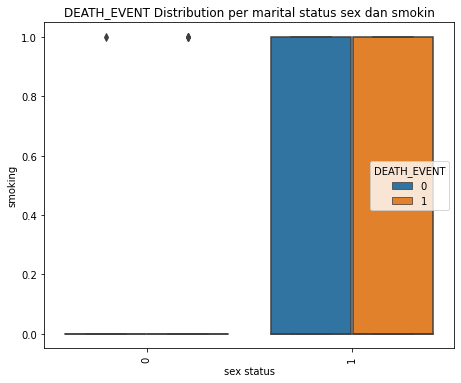

In [279]:
#Membuat Plot hubungan dengan default_payment_next_month
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 3)
sns.boxplot(x='sex', y='smoking', data=data, hue='DEATH_EVENT')
plt.title('DEATH_EVENT Distribution per marital status sex dan smokin')
plt.xlabel('sex status')
plt.ylabel('smoking')
plt.xticks(rotation=90)
plt.show()

tidak ada corelasi antara umur dan status merokok kepada kematian

<b><h1>Time</h1></b>

In [280]:
data['time'].unique()

array([ 65, 100,   8,  43, 186,  15,  16,  66,  77,  78,  85, 172, 207,
        12,  20,  23,  29,  32,  42,  88,  95, 109, 193, 214, 246,  28,
       108, 120, 126, 145, 187, 197, 212, 215, 245, 256,  30,  45,  83,
       130, 185, 220, 244, 271,  24,  60,  75,  86,  91, 107, 110, 140,
       210, 213, 233,  74, 115, 174,  44,  87,  97, 147, 196, 250, 257,
        33,  82,  90,  94, 104, 205, 237, 278,  10,  63,  14, 188,   4,
         7,  31,  41,  55,  59,  64,  73, 135, 146, 180, 198, 241,  38,
        67,  79, 111, 150, 154, 170, 201, 230, 235,  11,  26,  50, 112,
       113, 129, 148, 171, 216,  54,  61,  71,  72, 105, 119, 121, 194,
       195, 206, 208, 209, 240, 258, 270,   6,  27,  35,  40, 162, 280,
        68,  96, 123, 175, 247,  80, 118, 211, 285,  13,  76, 192, 200,
       231,  22, 106, 117, 134])

<p>berikut adalah data periode dirawat</p>

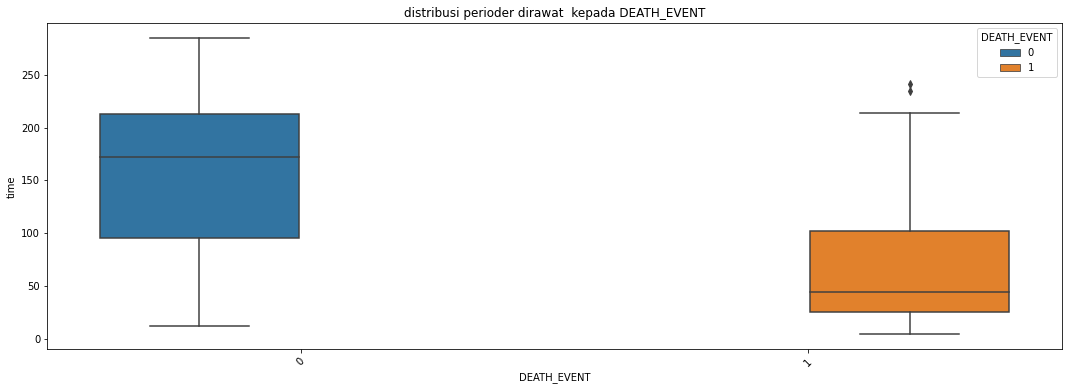

In [281]:
#membuat boxplot
plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='DEATH_EVENT', y='time', data=data, hue='DEATH_EVENT')
plt.title('distribusi perioder dirawat  kepada DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('time')
plt.xticks(rotation=45)
plt.show()

terlihat ada korelasi makin lama dirawat makin ada kesempatan untuk sembuh..feature ini akan dipakai nantinnya

<h1><b>C-MAP</b></h1>

In [282]:
#melihat corelasi dengan c-map
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

#Correlation Between Numeric Columns
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<p>Setelah dilihat dari correlation , sama seperti visualisasi peneliti terhadap kematian diatas pada saat pengenalan data,
berikut feature nanti yang akan dipilih</p>
<li>age 0.253729 
<li>ejection_fraction -0.268603
<li>serum_creatinine 0.294278
<li>serum_sodium  -0.195204
<li>time -0.526964
<br>kategori
<li>high_blood_pressure 0.079351

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get data for model inference

In [283]:
## Get data for model inference
data_inf = data.sample(20, random_state=17)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
121,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
94,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
138,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
288,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
139,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
13,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
230,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
165,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
58,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
122,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


In [284]:
# remove inference set from data set
data_train_test = data.drop(data_inf.index)
data_train_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [285]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


## Splitting between `X` (Features) and `y` (Target)

In [286]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('DEATH_EVENT', axis=1)
y = data_train_test['DEATH_EVENT']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
274,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
275,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186
276,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186
277,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215


In [287]:
# Split between Train-Set and Test-Set 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (223, 12)
Test Size  :  (56, 12)


## Handling outliers

In [288]:
#membuat fungsi IQR untuk deteksi outlier, dipakai jika data itu skew
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [289]:
#membuat fungsi untuk deteksi outlier, dipakai jika data itu tidak skew atau distribusi normal
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

<b><h1>limit_balance</h1></b>

In [290]:
#Cek Skew
data['age'].skew()

0.4230619067286355

data <b> tidak skew</b> karena kurang dari 0,5

In [291]:
# calculate boundaries for age
upper_boundary_age, lower_boundary_age = find_normal_boundaries(X_train, 'age')
upper_boundary_age, lower_boundary_age

(95.55986674519107, 24.640438187544348)

Karena data tidak <b>skew</b>,peneliti memakai normal bundaries untuk mencari upper dan lower

In [292]:
#melihat jumlah dan persentasi age
print(upper_boundary_age, lower_boundary_age)
print('age : {}'.format(len(X_train)))
print('age bigger than 95  : {}'.format(len(X_train[X_train['age'] > upper_boundary_age])))
print('')
print('limit_balance bigger than 95: {}'.format(len(X_train[X_train['age'] > upper_boundary_age])/len(X_train) * 100))

95.55986674519107 24.640438187544348
age : 223
age bigger than 95  : 0

limit_balance bigger than 95: 0.0


Ada <b>223</b> data Upper, dan <b>0%</b> dari banyaknya data di column <b>age</b>

<b><h1>ejection_fraction</h1></b>

In [293]:
#Cek Skew
data['ejection_fraction'].skew()

0.5553827516973213

data <b>tidak skew</b> karena pas dari 0,5

In [294]:
# calculate boundaries for ejection_fraction
upper_boundary_ejection_fraction, lower_boundary_ejection_fraction = find_normal_boundaries(X_train, 'ejection_fraction')
upper_boundary_ejection_fraction, lower_boundary_ejection_fraction

(72.56097136393461, 3.627369443240269)

Karena data tidak <b>skew</b>,peneliti memakai normal bundaries untuk mencari upper dan lower

In [295]:
#melihat jumlah dan persentasi ejection_fraction
print(upper_boundary_ejection_fraction, lower_boundary_ejection_fraction)
print('ejection_fraction : {}'.format(len(X_train)))
print('ejection_fraction bigger than 72   : {}'.format(len(X_train[X_train['ejection_fraction'] > upper_boundary_ejection_fraction])))
print('')
print('ejection_fraction bigger than 72: {}'.format(len(X_train[X_train['ejection_fraction'] > upper_boundary_ejection_fraction])/len(X_train) * 100))

72.56097136393461 3.627369443240269
ejection_fraction : 223
ejection_fraction bigger than 72   : 1

ejection_fraction bigger than 72: 0.4484304932735426


Ada <b>1</b> data terdeteksi <b>outlier dan sekitar 0.4%</b> dari banyaknya data

<b><h1>serum_creatinine<h1></b>

In [296]:
#Cek Skew
data['serum_creatinine'].skew()

4.455995882049029

data <b>tidak skew</b> karena kurang dari 0,5

In [297]:
# calculate boundaries for ejection_fraction
upper_boundary_serum_creatinine, lower_boundary_serum_creatinine = find_normal_boundaries(X_train, 'serum_creatinine')
upper_boundary_serum_creatinine, lower_boundary_serum_creatinine

(4.001049626395929, -1.3352200299833727)

Karena data tidak <b>skew</b>,peneliti memakai normal bundaries untuk mencari upper dan lower

In [298]:
#melihat jumlah dan persentasi serum_creatinine
print(upper_boundary_serum_creatinine, lower_boundary_serum_creatinine)
print('serum_creatinine : {}'.format(len(X_train)))
print('serum_creatinine bigger than 4  : {}'.format(len(X_train[X_train['serum_creatinine'] > upper_boundary_serum_creatinine])))
print('')
print('serum_creatinine bigger than 4: {}'.format(len(X_train[X_train['serum_creatinine'] > upper_boundary_serum_creatinine])/len(X_train) * 100))

4.001049626395929 -1.3352200299833727
serum_creatinine : 223
serum_creatinine bigger than 4  : 3

serum_creatinine bigger than 4: 1.345291479820628


Ada <b>223</b> data, terdeteksi <b>outlier ada 3, dan sekitar 1.3%</b> dari banyaknya data

<b><h1>serum_sodium</h1></b>

In [299]:
#Cek Skew
data['serum_sodium'].skew()

-1.0481360160574988

data <b>skew</b> karena lebih dari 0,5

In [300]:
# calculate boundaries for limit_balance IQR
upper_boundary_serum_sodium, lower_boundary_serum_sodium = find_skewed_boundaries(X_train,'serum_sodium',1.5)
upper_boundary_serum_sodium, lower_boundary_serum_sodium

(149.0, 125.0)

In [301]:
#melihat jumlah dan persentasi serum_sodium
print(upper_boundary_serum_sodium, lower_boundary_serum_sodium)
print('serum_sodium : {}'.format(len(X_train)))
print('payserum_sodium_ bigger than 149  : {}'.format(len(X_train[X_train['serum_sodium'] > upper_boundary_serum_sodium])))
print('')
print('serum_sodium bigger than 149: {}'.format(len(X_train[X_train['serum_sodium'] > upper_boundary_serum_sodium])/len(X_train) * 100))

149.0 125.0
serum_sodium : 223
payserum_sodium_ bigger than 149  : 0

serum_sodium bigger than 149: 0.0


Ada <b>331</b> data, terdeteksi <b>outlier 0 dan sekitar 0%</b> dari banyaknya data

<b><h1>time</h1></b>

In [302]:
#Cek Skew
data['time'].skew()

0.12780264559841178

data <b>tidak skew</b> karena pas dari 0,5

In [303]:
# calculate boundaries for time
upper_boundary_time, lower_boundary_time = find_normal_boundaries(X_train, 'time')
upper_boundary_time, lower_boundary_time

(365.3686989899161, -102.69605325000578)

In [304]:
#melihat jumlah dan persentasi time
print(upper_boundary_time, lower_boundary_time)
print('time : {}'.format(len(X_train)))
print('time bigger than 365   : {}'.format(len(X_train[X_train['time'] > upper_boundary_time])))
print('')
print('time bigger than 365: {}'.format(len(X_train[X_train['time'] > upper_boundary_time])/len(X_train) * 100))

365.3686989899161 -102.69605325000578
time : 223
time bigger than 365   : 0

time bigger than 365: 0.0


Ada <b>223</b> data terdeteksi <b>outlier 0 dan sekitar 0%</b> dari banyaknya data

<b><h1>Setelah peneliti lihat untuk disemua status data masih valid jadi peneliti tidak melakukan trimm atau censoring </h1></b>

## Handling missing Value

In [305]:
# Check Missing Values in `X_train`
X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [306]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [307]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [308]:
# Check Missing Values in `y_test`

y_test.isna().sum()

0

<b><h1>Tidak ada missing value di X ataupun y</h1></b>

## Feature Selection

In [309]:
#display Xtrain
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
124,63.0,1,514,1,25,1,254000.0,1.3,134,1,0,83
258,78.0,0,224,0,50,0,481000.0,1.4,138,1,1,192
223,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146
172,45.0,1,130,0,35,0,174000.0,0.8,139,1,1,121
194,58.0,1,60,0,38,0,153000.0,5.8,134,1,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...
31,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126
240,60.0,1,1082,1,45,0,250000.0,6.1,131,1,0,107
143,50.0,0,1548,0,30,1,211000.0,0.8,138,1,0,108
241,50.0,0,115,0,45,1,184000.0,0.9,134,1,1,118


In [310]:
# membuat df bedasarkan Feature selection

X_train_new=X_train[['age','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','time']]
X_test_new=X_test[['age','ejection_fraction','serum_creatinine','serum_sodium','time']]
X_train_new

,age,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time
124,63.0,25,1,1.3,134,83
258,78.0,50,0,1.4,138,192
223,52.0,40,0,0.9,140,146
172,45.0,35,0,0.8,139,121
194,58.0,38,0,5.8,134,26
...,...,...,...,...,...,...
31,50.0,35,0,0.9,142,126
240,60.0,45,0,6.1,131,107
143,50.0,30,1,0.8,138,108
241,50.0,45,1,0.9,134,118


## Split between Numerical Columns and Categorical Columns

In [311]:
# Get Numerical Columns and Categorical Columns

num_cols = ['age','ejection_fraction','serum_creatinine','serum_sodium','time']
cat_cols = ['high_blood_pressure']

#define variable train,tes ke cat dan num
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

print('Numerical Columns   : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numerical Columns   :  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
Categorical Columns :  ['high_blood_pressure']


<p>Peneliti mendifind variable untuk numerik dan kategori</p>

## Feature Scaling

<p>Peneliti memakai scaling standars scaler karena feature banyak<b>tidak skew</b></p>

In [312]:
# Feature Scaling using standarscaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[ 0.24588789, -1.14228431, -0.03709203, -0.60785448, -0.62100467],
       [ 1.51778864,  1.0386181 ,  0.07559902,  0.30188746,  0.77938131],
       [-0.68683934,  0.16625713, -0.48785623,  0.75675843,  0.18839273],
       ...,
       [-0.85642611, -0.70610383, -0.60054728,  0.30188746, -0.29981522],
       [-0.85642611,  0.60243762, -0.48785623, -0.60785448, -0.17133945],
       [ 0.75464819, -1.57846479, -0.14978308, -0.60785448, -0.74948045]])

## Feature Encoding

Tidak Melakukan proses Encoding karena data Feature bertipe numerik semua

## Concate between Numerical Columns and Categorical Columns

In [313]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_test_final

array([[-1.78079034e-01, -8.21505839e-03, -7.13238334e-01,
         1.21162940e+00, -6.21004670e-01,  1.00000000e+00],
       [-7.71632721e-01,  1.03861810e+00, -7.13238334e-01,
         7.56758429e-01, -6.72394981e-01,  0.00000000e+00],
       [ 1.68737541e+00, -8.21505839e-03,  6.39054271e-01,
         1.66650037e+00, -1.39185934e+00,  0.00000000e+00],
       [ 4.15474653e-01, -7.06103828e-01,  3.00981119e-01,
        -1.52983510e-01, -1.43040207e+00,  1.00000000e+00],
       [ 4.15474653e-01, -8.21505839e-03,  4.13672170e-01,
         5.29322945e-01,  1.13911349e+00,  0.00000000e+00],
       [ 4.15474653e-01, -1.14228431e+00,  4.13247683e+00,
        -1.51759642e+00,  9.72094980e-01,  0.00000000e+00],
       [-1.36518641e+00, -7.06103828e-01,  3.00981119e-01,
        -1.51759642e+00,  1.44745536e+00,  1.00000000e+00],
       [ 8.39441572e-01, -2.69923347e-01, -1.49783082e-01,
        -1.06272545e+00,  1.07487560e+00,  1.00000000e+00],
       [ 2.87448279e+00, -8.21505839e-03,  5.601

# 6 - Model Definition

Disini akan melakukan dengan model

<li>Random Forest
<li>Gradient Boosting

In [314]:
#mendefinisikan model

ranfor= RandomForestClassifier()
gb_clf = GradientBoostingClassifier()






# 7 - Model Training

In [315]:
#Random Forest
%timeit ranfor.fit(X_train_final, y_train)

138 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [316]:
#Random Forest
%timeit gb_clf.fit(X_train_final, y_train)

69.2 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 8 - Model Evaluation

peneliti akan melakukan dengan validation score dan accuracy

##Random Forest

In [317]:
#Define variable untuk memakai Cross_val_score
scores_ranfor = cross_val_score(ranfor, X_train_final, y_train,cv=5)

In [318]:
#memakai method mean() untuk mencari mean
scores_ranfor.mean()

0.8076767676767677

In [319]:
#memakai method std() untuk mencari std
scores_ranfor.std()

0.05048322760846807

##Gradient Boosting

In [320]:
#Define variable untuk memakai Cross_val_score
scores_gb_clf = cross_val_score(gb_clf, X_train_final, y_train,cv=5)

In [321]:
#memakai method mean() untuk mencari mean
scores_gb_clf.mean()

0.8388888888888889

In [322]:
#memakai method std() untuk mencari std
scores_gb_clf.std()

0.03141397901806087

<h1>setelah melakukan evaluasi dengan validation score peneliti akan menampilkan rekap di hasil scoring</h1>

##<b><h1>Hasil Scoring dan Pemilihan Algoritma</h1></b>


In [323]:
#define variable dan melakukan predict bagi data test dan data train


#RandomForestClassifier()
y_pred_train_ranfor = ranfor.predict(X_train_final)
y_pred_test_ranfor = ranfor.predict(X_test_final)

#GradientBoostingClassifier()
y_pred_train_gb_clf = gb_clf.predict(X_train_final)
y_pred_test_gb_clf = gb_clf.predict(X_test_final)

In [324]:
#Menampilkan acc_score di semua model algoritma yang sudah kita definisikan
print('-----TRAIN-----')

print('accuracy score train RandomForestClassifier : ',accuracy_score(y_train,y_pred_train_ranfor))
print('accuracy score train GradientBoostingClassifier : ',accuracy_score(y_train,y_pred_train_gb_clf))

print('-----TEST-----')

print('accuracy score train RandomForestClassifier : ',accuracy_score(y_test,y_pred_test_ranfor))
print('accuracy score train GradientBoostingClassifier : ',accuracy_score(y_test,y_pred_test_gb_clf))


-----TRAIN-----
accuracy score train RandomForestClassifier :  1.0
accuracy score train GradientBoostingClassifier :  0.9865470852017937
-----TEST-----
accuracy score train RandomForestClassifier :  0.8392857142857143
accuracy score train GradientBoostingClassifier :  0.8214285714285714


dari accuracy lebih bagus random forest karena bernilai 1
sedangkan gradian boosting 0.98 <br>
di testing pun juga lebih bagus random forest

In [325]:
#Menampilkan semua perhitungan validation score di semua model algoritma yang sudah kita definisikan 

print('')
print (f'Model Random Forest Mean :{scores_ranfor.mean()}')
print (f'Model Random Forest STD :{scores_ranfor.std()}')
print('')
print (f'Model Gradient Boosting Mean :{scores_gb_clf.mean()}')
print (f'Model Gradient Boosting STD :{scores_gb_clf.std()}')



Model Random Forest Mean :0.8076767676767677
Model Random Forest STD :0.05048322760846807

Model Gradient Boosting Mean :0.8388888888888889
Model Gradient Boosting STD :0.03141397901806087


Jika dilihat algoritma random forest lebih buruk dari boosting cek dengan validation score, dimana validation score disini di set cv=5 yang artinnya cek di 5 metrix

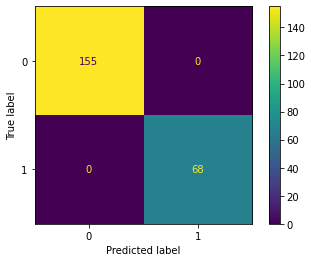

In [326]:
#y_train predict randfor
cm = confusion_matrix(y_train, y_pred_train_ranfor, labels=ranfor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ranfor.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_train meakukan sempurna prediksi dimana tidak ada kesalahan, prediksi tidak meninggal 155 dan prediksi meninggal 68

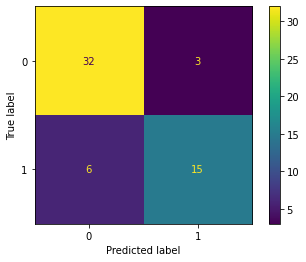

In [327]:
#y_test predict randfor
cm = confusion_matrix(y_test, y_pred_test_ranfor, labels=ranfor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ranfor.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_test meakukan kesalahan prediksi 
- pada tabel 0 data yang diprediksi bener adalah 32 dan salah prediksi sebesar 3 dimana 3 itu seharusnya data milik prediksi pasien 1
- pada tabel 1 data yang diprediksi bener adalah 16 dan salah prediksi sebesar 5 dimana 5 itu seharusnya prediksi di data 0

In [328]:
#randfor
print(classification_report(y_train,y_pred_train_ranfor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        68

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



pada y train : 
- precision untuk 1 yaitu 1(100%) yg artinya  berhasil meprediksi 100% status <b>tidak meninggal</b> dan 0% di salah meprediksi status tersebut 
- precision untuk 1 yaitu 1 yg artinya  berhasil meprediksi 100% status <b>meninggal</b> dan 0% salah meprediksi status tersebut 

- recall untuk 0 yaitu 1(100%) yg artinya  berhasil meprediksi 100% orang yang memiliki status <b>tidak meninggal</b> dan 0%  salah meprediksi status tersebut 
- recall untuk 1 yaitu 1 yg artinya  berhasil meprediksi 100% status <b>meninggal</b> dan 0% di salah meprediksi status tersebut 


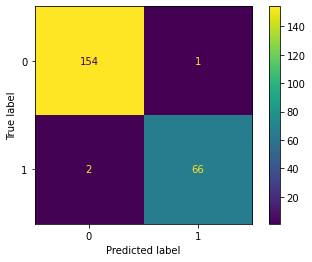

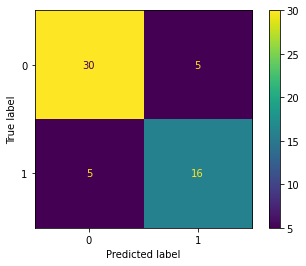

In [329]:
#y_train predict gb_clf
cm = confusion_matrix(y_train, y_pred_train_gb_clf, labels=gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_clf.classes_)

disp.plot()
plt.show()

#y_test predict gb_clf
cm = confusion_matrix(y_test, y_pred_test_gb_clf, labels=gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_clf.classes_)

disp.plot()
plt.show()

Untuk train 0 ada 154 benar prediksi dan ada 1 prediksi salah dimana 1 seharusnnya
ada di status 1<br>
untuk train 1 ada 66 benar prediksi dan 2 prediksi salah dimana 2 data itu seharusnya
di data 0<br>
Untuk tes 0 ada 30 benar prediksi dan ada 5 prediksi salah dimana 5 seharusnnya
ada di status 1<br>
untuk tes 1 ada 16 benar prediksi dan 5 prediksi salah dimana 5 data itu seharusnya
di data 0

In [330]:
#randfor
print(classification_report(y_train,y_pred_train_gb_clf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       155
           1       0.99      0.97      0.98        68

    accuracy                           0.99       223
   macro avg       0.99      0.98      0.98       223
weighted avg       0.99      0.99      0.99       223



pada y train : 
- precision untuk 0.99 yaitu 0.99(99%) yg artinya  berhasil meprediksi 99% status <b>tidak meninggal</b> dan 1% di salah meprediksi status tersebut 
- precision untuk 0.99 yaitu 0.99(99%) yg artinya  berhasil meprediksi 99% status <b>meninggal</b> dan 1% di salah meprediksi status tersebut 

- recall untuk 0 yaitu 0.99(99%) yg artinya  berhasil meprediksi 99% orang yang memiliki status <b>tidak meninggal</b> dan 1%  salah meprediksi status tersebut kita prediksi bukan sebagai tidak meninggal, padahal harusnya dia
masuk ke kelas meninggal
- recall untuk 1 yaitu 0.97(3%) yg artinya  berhasil meprediksi 97% orang yang memiliki status <b>meninggal</b> dan 3%  salah meprediksi status tersebut kita prediksi bukan sebagai meninggal, padahal harusnya dia
masuk ke kelas tidak meninggal
ada kerugian disini jika yang seharusnya masuk ke prediksi meninggal tetapi status prediksi meninggal begitu juga sebaliknnya.

##Pemberian Hyperparameter

In [331]:
#define dari parameter manual
ranfortuning= RandomForestClassifier(n_estimators=86, max_depth=18)
gb_clftuning = GradientBoostingClassifier(n_estimators=20)



In [332]:
#dibuat fit dahulu
ranfortuning.fit(X, y)
gb_clftuning.fit(X, y)

GradientBoostingClassifier(n_estimators=20)

random forest setelah di tuning

In [333]:
#validation score setelah model di tuning
scores_ranfortuning = cross_val_score(ranfortuning, X_train_final, y_train,cv=5)

In [334]:
#melihat mean dari hasil validation model setelah di tuning
scores_ranfortuning.mean()

0.821010101010101

In [335]:
#melihat std dari hasil validation model setelah di tuning
scores_ranfortuning.std()

0.04089300095105496

gradian booster setelah di tuning

In [336]:
#validation score setelah model di tuning
scores_gb_clftuning = cross_val_score(gb_clftuning, X_train_final, y_train,cv=5)

In [337]:
#melihat mean dari hasil validation model setelah di tuning
scores_gb_clftuning.mean()

0.82989898989899

In [338]:
#melihat std dari hasil validation model setelah di tuning
scores_gb_clftuning.std()

0.032113270093694905

In [339]:
#tampilan model dengan validation score sebelum dan setelah di tuning
print('randfor')
print(f'score Mean model sebelum di tuning:{scores_ranfor.mean()}')
print(f'score Mean model setelah di tuning:{scores_ranfortuning.mean()}')
print('gradian booster')
print(f'score Mean model sebelum di tuning:{scores_gb_clf.mean()}')
print(f'score Mean model setelah di tuning:{scores_gb_clftuning.mean()}')

randfor
score Mean model sebelum di tuning:0.8076767676767677
score Mean model setelah di tuning:0.821010101010101
gradian booster
score Mean model sebelum di tuning:0.8388888888888889
score Mean model setelah di tuning:0.82989898989899


dari validation score setelah di kedua model diberi hyperparameter malah makin kecil

note setelah diberi hyper parameter validation score makin kecil jadi peneliti memakai baseline model

#9-Model Inference

In [340]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
1,65.0,1,113,1,60,1,203000.00,0.90,140,0,0,94,0
2,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120,0
3,63.0,0,193,0,60,1,295000.00,1.30,145,1,1,107,0
4,59.0,1,176,1,25,0,221000.00,1.00,136,1,1,150,1
5,72.0,0,211,0,25,0,274000.00,1.20,134,0,0,207,0
6,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
7,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
8,50.0,0,318,0,40,1,216000.00,2.30,131,0,0,60,1
9,55.0,0,1199,0,20,0,263358.03,1.83,134,1,1,241,1


##Inference Preprocessing

In [341]:
# Split Numerical and Categorical Features
inference_num = data_inf[num_cols]
inference_cat = data_inf[cat_cols]

# Scale Numerical Features
inference_num_scaled = scaler.transform(inference_num)

# Concatenate Numerical and Categorical Features
inference_final = np.concatenate([inference_num_scaled, inference_cat], axis=1)

##Predicition


In [342]:
y_pred_inf = ranfor.predict(inference_final)
y_pred_inf_gb_clf = gb_clf.predict(inference_final)

In [343]:
#rubah ke dataframe
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['random forest'])
y_pred_inf_gb_clf = pd.DataFrame(y_pred_inf_gb_clf, columns=['gradian_boosting'])

In [344]:
#Buat dataframe prediction
predictions = pd.concat([data_inf['DEATH_EVENT'], y_pred_inf, y_pred_inf_gb_clf], axis=1)
predictions.columns = ['Actual','ranfor','gradian_boost']
predictions

,Actual,ranfor,gradian_boost
0,1,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,0
5,0,0,0
6,1,1,1
7,0,0,0
8,1,1,0
9,1,1,0


<li>dari 20 data inference ada 3 salah prediksi untuk random forest.
<li>dari 20 data inference ada 6 salah prediksi untuk gradian booster.

#10-Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
- Peneliti melakukan evaluasi dengan boxplot dan c-map
- dari prediksi kematian umur makin tua makin tinggi tingkat kematiannya
- dan makin lama dirawat, makin ada kesempatan untuk sembuh jika bertahan
-

Dari proses preprocessing didapatkan:
1. data skew dan outlier peneliti tidak trim atau censoring, dikarenakan data masih bersivat valid
2. peneliti tidak melakukan encode dikarenakan feature kategorikal berbentuk numerik
3. dilakukan MinMaxScaler karena data skew

Dari proses model evaluation dan analysis didapatkan:
1. peneliti menggunakan random fores dan gradian booster
2. Peneliti melakukan penambahan hyper parameter terhadap ke 2 model tersebut, dan ternyata hasil lebih buruk ketika diberi hyper parameter, karena keterbatasan waktu yang dimiliki peneliti, peneliti tidak mencoba banyak hal, dan memutuskan untuk memakai baseline dari kedua model tersebut.
3. pada saat validation score, model gradian booster lebih bagus tetapi pada saat dicoba dengan data inference, ternyata random forest lebih bagus karena tingkat kesalahannya lebih sedikit.
4. kekurangan peneliti adalah, kurangnya waktu untuk eksporisasi lebih jauh terhadap model.

Insigth:
1. dibutuhkan feature yang lebih menarik seperti status menikah ataupun status pasangangan masih ada atau tidak, karena menurut peneliti dari status tersebut mempengaruhi semangat hidup dari pasien.


#Conceptual Problems

<b>1.Apakah yang dimaksud dengan Bagging?</b>


---

Bootstrap aggregating, disebut juga bagging, adalah penggabungan algoritma pembelajaran mesin (machine learning) yang dirancang untuk meningkatkan stabilitas dan akurasi dari algoritma machine learning yang digunakan dalam klasifikasi statistik dan regresi.

<b>2.Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?</b>


---
<li>Random Forest adalah algoritma dalam machine learning yang digunakan untuk pengklasifikasian data set dalam jumlah besar. Karena fungsinya bisa digunakan untuk banyak dimensi dengan berbagai skala dan performa yang tinggi.
<li>Gradient boosting adalah teknik supervised learning berbasis decision tree. Algoritma dimulai dari menghasilkan pohon klasifikasi awal dan terus menyesuaikan pohon baru melalui minimalisasi fungsi kerugian
